In [1]:
import torch

In [35]:
def linear_quantize(tensor, dtype=torch.int8):
    r_min = tensor.min().item()
    r_max = tensor.max().item()
    
    q_min = torch.iinfo(dtype).min
    q_max = torch.iinfo(dtype).max
    
    scale = (r_max - r_min) / (q_max - q_min)
    zero_point = int(torch.round(torch.tensor(q_min - (r_min / scale))).item())

    zero_point = torch.clamp_(torch.tensor(zero_point), min=q_min, max=q_max)
    
    quantized_tensor = torch.round(tensor / scale + zero_point)
    quantized_tensor = torch.clamp_(quantized_tensor, min=q_min, max=q_max).to(torch.int)
    return scale, zero_point.item(), quantized_tensor

In [36]:
def linear_dequantize(scale, zero_point, tensor, dtype=torch.int):
    r = scale * (tensor - zero_point)
    
    return r

In [37]:

test_tensor=torch.tensor(
    [[191.6, -13.5, 728.6],
     [92.14, 295.5,  -184],
     [0,     684.6, 245.5]]
)

In [39]:
scale, zero_pt, quant_tensor = linear_quantize(test_tensor)
dequan_tensor = linear_dequantize(scale, zero_pt, quant_tensor)

In [40]:
print("Original Tensor:\n", test_tensor)
print("Quantized Tensor:\n", quant_tensor)
print("Dequantized Tensor:\n", dequan_tensor)

Original Tensor:
 tensor([[ 191.6000,  -13.5000,  728.6000],
        [  92.1400,  295.5000, -184.0000],
        [   0.0000,  684.6000,  245.5000]])
Quantized Tensor:
 tensor([[ -23,  -81,  127],
        [ -51,    6, -128],
        [ -77,  114,   -8]], dtype=torch.int32)
Dequantized Tensor:
 tensor([[ 193.2565,  -14.3153,  730.0800],
        [  93.0494,  297.0423, -182.5200],
        [   0.0000,  683.5552,  246.9388]])


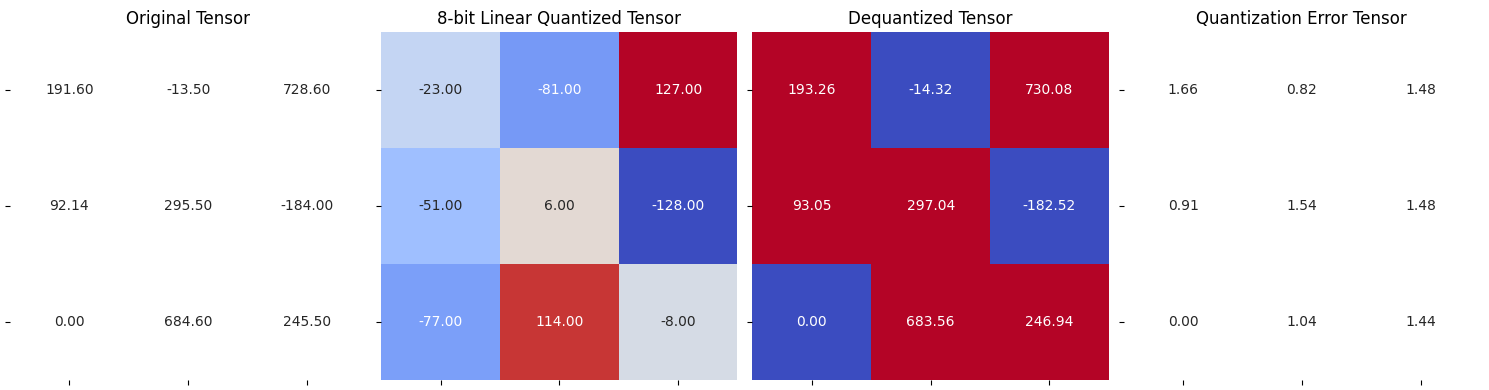

In [43]:

from helper import plot_quantization_errors
plot_quantization_errors(test_tensor, quant_tensor,
                         dequan_tensor)